In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

**Load train dataset**

In [ ]:
train_df = pd.read_csv('/content/train_ctrUa4K.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**1.EXPLORATORY DATA ANALYSIS**

In [ ]:
#number of rows and columns
train_df.shape

(614, 13)

In [ ]:
#basic info of the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Histogram to see the distribution of data***

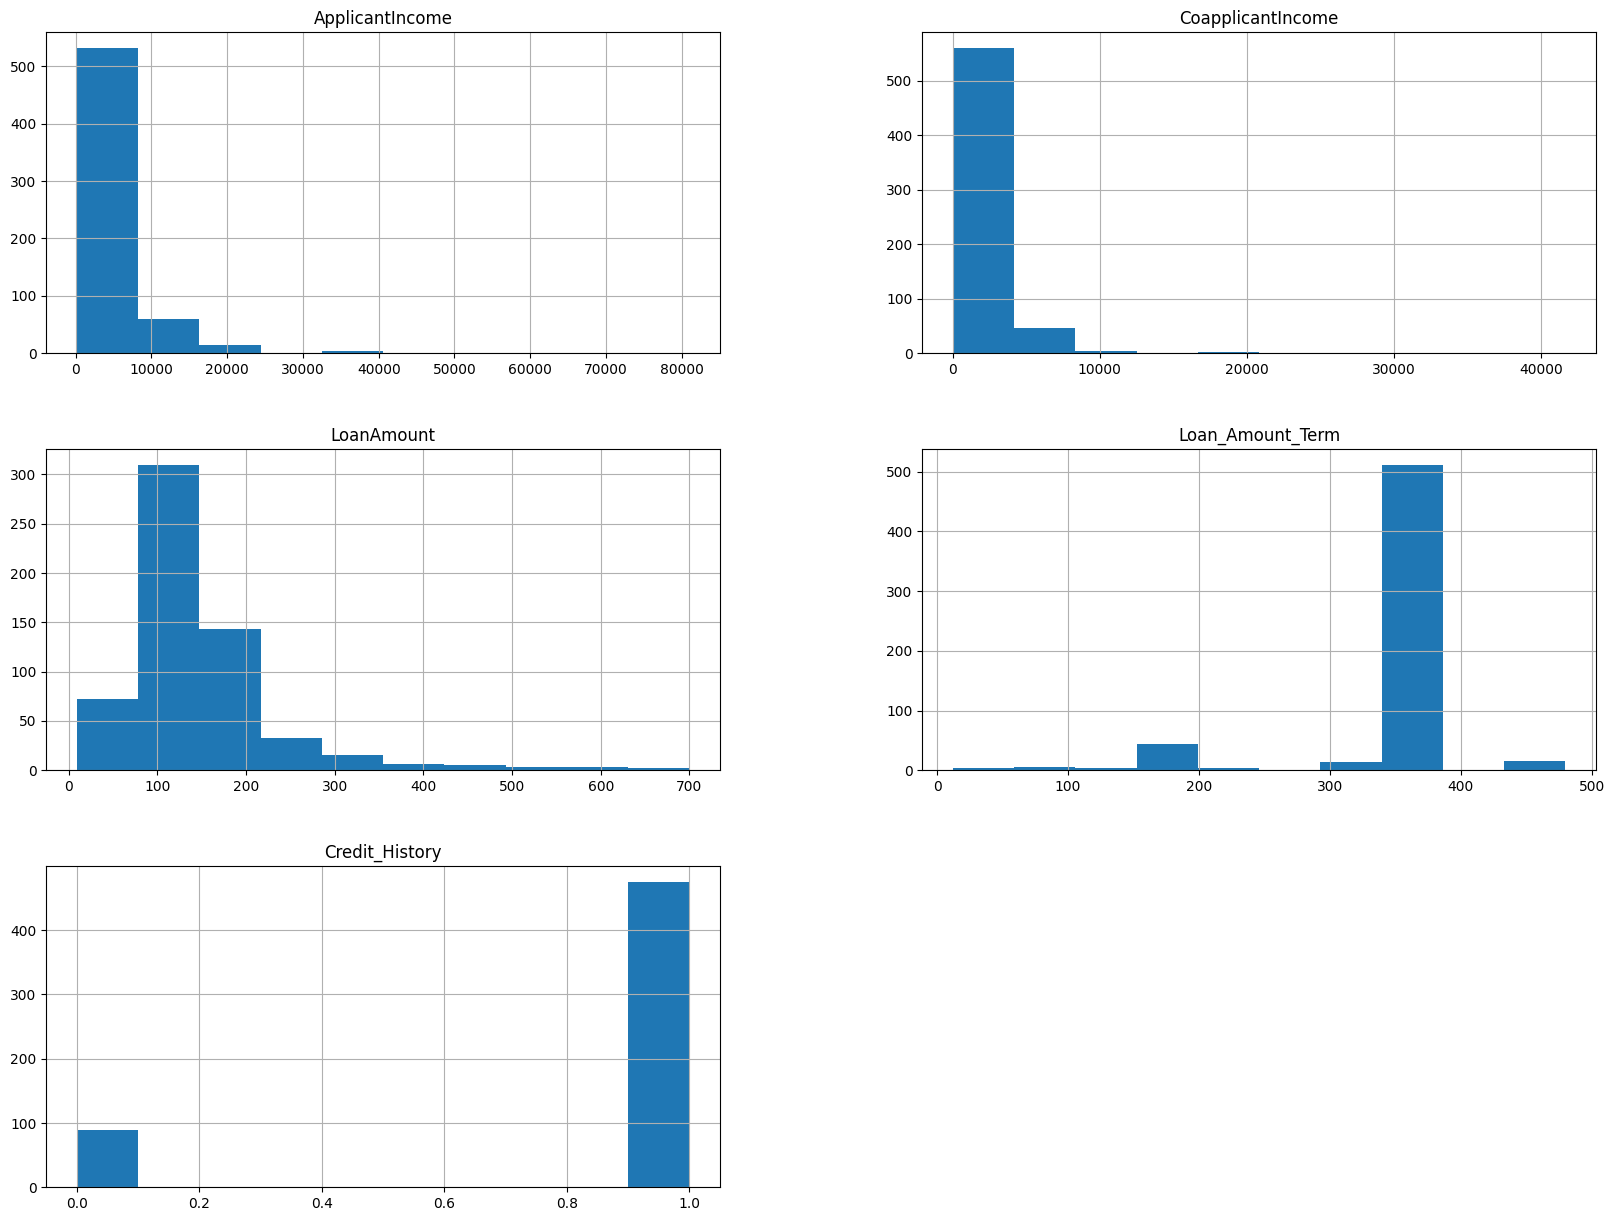

In [ ]:
train_df.hist(figsize=(20,15))
plt.show()

**How many percentage got loan based on the following**

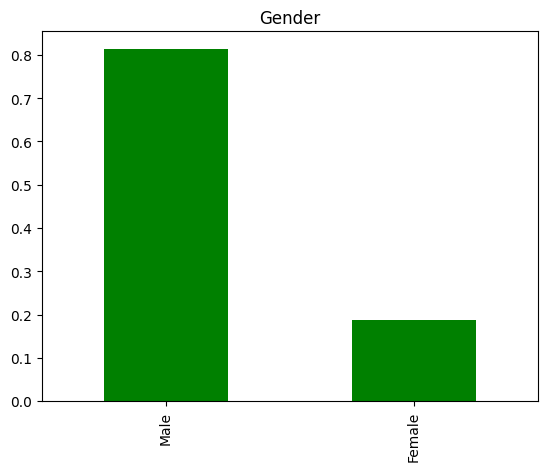

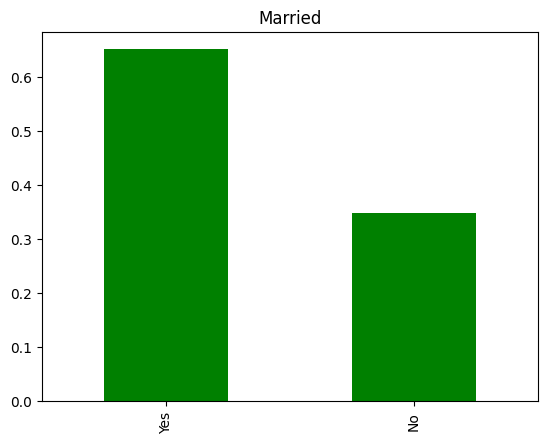

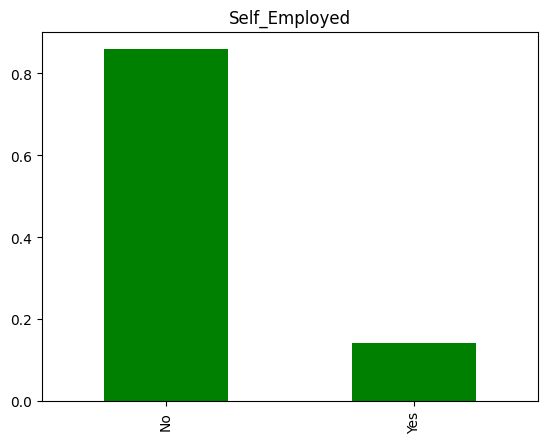

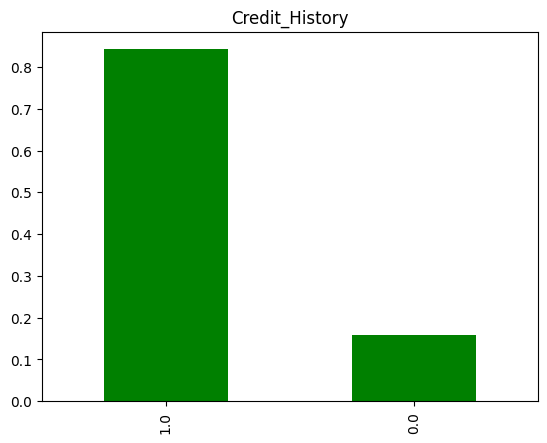

In [ ]:
train_df['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender',color = 'g')
plt.show()
train_df['Married'].value_counts(normalize=True).plot.bar(title= 'Married',color = 'g')
plt.show()
train_df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed',color = 'g')
plt.show()
train_df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History',color = 'g')
plt.show()

**Correlation**

<ipython-input-85-5b5dd71b647d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()


<Axes: >

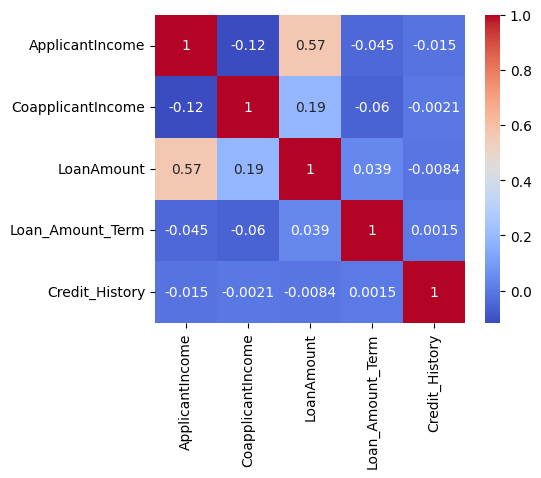

In [ ]:
corr = train_df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

**2.PREPROCESSING**

In [ ]:
#check for null values
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Fill object columns with ffill and numerical columns with median()
for i in ['Gender','Dependents','Self_Employed','Married']:
  train_df[i] = train_df[i].fillna(method='ffill')
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
  train_df[i] = train_df[i].fillna(train_df[i].median())

In [ ]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#check for outliers
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


**Since all the elements in the dataset are sensitive to the calculation of eligibility for loan,no element can be considered as outliers**

**Encoding**

In [ ]:
#check how many kinds of data are present in object columns
for i in ['Dependents','Education','Self_Employed','Property_Area']:
  print(train_df[i].nunique())

4
2
2
3


In [ ]:
#drop column 'Loan_ID'
train_df = train_df.drop('Loan_ID',axis = 1)

In [ ]:
le = LabelEncoder()
for i in ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']:
  train_df[i] = le.fit_transform(train_df[i])
train_df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


**Scaling**

In [ ]:
minmax = MinMaxScaler()
scaled_train = minmax.fit_transform(train_df)

In [ ]:
train_df = pd.DataFrame(scaled_train)

In [ ]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.814332,0.651466,0.253529,0.218241,0.140065,0.064978,0.038910,0.197905,0.706005,0.855049,0.518730,0.687296
std,0.389155,0.476895,0.337335,0.413389,0.347338,0.075560,0.070229,0.121718,0.137668,0.352339,0.393741,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.033735,0.000000,0.132055,0.743590,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.045300,0.028524,0.172214,0.743590,1.000000,0.500000,1.000000
75%,1.000000,1.000000,0.666667,0.000000,0.000000,0.069821,0.055134,0.225398,0.743590,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Load test dataset**

In [ ]:
test_df = pd.read_csv('/content/test_lAUu6dG.csv')
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
#Find the number of rows and columns
test_df.shape

(367, 12)

In [ ]:
#Basic info about dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
#Check out for the presence of null values
test_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
#Fill null values,object columns with ffill and numerical columns with median()
for i in ['Gender','Dependents','Self_Employed']:
  test_df[i] = test_df[i].fillna(method='ffill')
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
  test_df[i] = test_df[i].fillna(test_df[i].median())

In [ ]:
test_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
#Check for outliers
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


**Since all the elements in the dataset are sensitive to the calculation of eligibility for loan,no element can be considered as outliers**

**Encoding**

In [ ]:
#check how many kinds of data are present in object columns
for i in ['Dependents','Education','Self_Employed','Property_Area']:
  print(test_df[i].nunique())

4
2
2
3


In [ ]:
Id_column = test_df['Loan_ID']

In [ ]:
test_df = test_df.drop('Loan_ID',axis = 1)

In [ ]:
le = LabelEncoder()
for i in ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']:
  test_df[i] = le.fit_transform(test_df[i])
test_df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
5,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2
6,0,0,1,1,0,2226,0,59.0,360.0,1.0,1
7,1,1,2,1,0,3881,0,147.0,360.0,0.0,0
8,1,1,2,0,0,13633,0,280.0,240.0,1.0,2
9,1,0,0,1,0,2400,2400,123.0,360.0,1.0,1


In [ ]:
test_df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.792916,0.634877,0.282470,0.228883,0.103542,0.066258,0.065399,0.206860,0.710597,0.839237,0.539510
std,0.405770,0.482122,0.360233,0.420687,0.305082,0.067707,0.097260,0.116781,0.136410,0.367814,0.412168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.039488,0.000000,0.139847,0.746835,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.052200,0.042708,0.185824,0.746835,1.000000,0.500000
75%,1.000000,1.000000,0.666667,0.000000,0.000000,0.069765,0.101271,0.248084,0.746835,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**3.MODELLING**

In [ ]:
y = train_df[11]
X = train_df.drop(11,axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr_model = lr.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_score(y_test,lr_pred)

0.7886178861788617

In [ ]:
lr_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

**SVM**

In [ ]:
from sklearn.svm import SVC
svm_class = SVC(kernel = 'linear')
svm_model = svm_class.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)
accuracy_score(y_test,svm_pred)

0.7886178861788617

In [ ]:
svm_pred[:21]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_class = DecisionTreeClassifier()
dt_model = dt_class.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)
accuracy_score(y_test,dt_pred)

0.7154471544715447

In [ ]:
dt_pred[:21]

array([1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1.])

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier()
rf_model = rf_class.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)
accuracy_score(y_test,rf_pred)

0.7723577235772358

**Logistic regression gives the best accuracy score**

**CROSS VALIDATION ON LOGISTIC REGRESSION**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skf = StratifiedKFold(n_splits=10)

In [ ]:
skf_lr = cross_val_score(lr_model,X,y,cv=skf)
np.mean(skf_lr)

0.8095716552088842

**USING TEST DATASET FOR THE BEST MODEL**

In [ ]:
lr_pred = lr_model.predict(test_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


**Sample Submission file**

In [ ]:
submission = pd.read_csv('/content/sample_submission_49d68Cx.csv')
submission

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


**Converting 'Loan_Status' and 'Loan_ID columns of submission dataset**

In [ ]:
submission['Loan_Status']=lr_pred
submission['Loan_ID']=Id_column

In [ ]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

**Converting submission dataset to csv file**

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('sajnap_Logistic.csv',index=False)

In [ ]:
myfile = pd.read_csv('/content/sajnap_Logistic.csv')
myfile.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


**4.FINE TUNING TO IMPROVE MODEL**

In [ ]:
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 50}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 70}

In [ ]:
model_1 = DecisionTreeClassifier(**params_1)
model_2 = DecisionTreeClassifier(**params_2)

In [ ]:
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=70, splitter='random')

In [ ]:
preds_1 = model_1.predict(test_df)
preds_2 = model_2.predict(test_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
submission['Loan_Status']=preds_1

In [ ]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('SajnapLogistic.csv',index=False)

**SCORE USING SVM PREDICTIONS**

In [ ]:
pred_svm_test = svm_model.predict(test_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
submission['Loan_Status']=pred_svm_test

In [ ]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('SajnapLogistic.csv',index=False)

**Score using RF predictions**

In [ ]:
pred_rf_test = rf_model.predict(test_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
submission['Loan_Status']=pred_rf_test

In [ ]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('SajnapLogistic.csv',index=False)